# Jay Bhanushali - 60009200047
---
# ML-II Lab 7: Anomaly Detection in Credit Card data using Self Organizing Map (SOM)

In [1]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=df20407a7a5895cdd3daf467a150b0066bfa8e7dc3dab90d5e147caf529035e4
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from minisom import MiniSom 
# Minisom library and module is used for performing Self Organizing Maps 
from pylab import plot, axis, show, pcolor, colorbar, bone 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Data 

In [4]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Credit_Card_Applications.csv')
data 

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


Shape of the data: 

In [5]:
data.shape 

(690, 16)

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


## Defining X, y
X containing only features and data <br>
y caotains target column

In [40]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values 

In [41]:
print(X[:5])

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 1.1460000e+01 2.0000000e+00
  4.0000000e+00 4.0000000e+00 1.5850000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 7.0000000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 1.6500000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 1.7500000e+00 1.0000000e+00
  4.0000000e+00 4.0000000e+00 1.2500000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 2.8000000e+02 1.0000000e+00]
 [1.5687688e+07 0.0000000e+00 2.1670000e+01 1.1500000e+01 1.0000000e+00
  5.0000000e+00 3.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.1000000e+01 1.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5715750e+07 1.0000000e+00 2.0170000e+01 8.1700000e+00 2.0000000e+00
  6.0000000e+00 4.0000000e+00 1.9600000e+00 1.0000000e+00 1.

In [42]:
print(y[:5])

[0 0 0 1 1]


In [43]:
sc = MinMaxScaler(feature_range = (0, 1)) 
X = sc.fit_transform(X) 
pd.DataFrame(X) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.842681,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05,0.01212
1,0.696091,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08,0.00000
2,0.388982,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14,0.00000
3,0.488425,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00,0.00000
4,0.600795,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03,0.00158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.971089,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00,0.00000
686,0.817951,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00,0.00044
687,0.439420,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05,0.00000
688,0.844035,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06,0.00011


## Set the hyper parameters 

In [44]:
som_grid_rows = 10 
som_grid_columns = 10 
iterations = 20000 
sigma = 1 
learning_rate = 0.5

## Making the SOM model

In [47]:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate) 

Weights initialization

In [48]:
som.random_weights_init(X) 

Training

In [49]:
som.train_random(X, iterations) 

## Distance map from the weights

In [50]:
som.distance_map() 

array([[0.21370762, 0.37741108, 0.37338656, 0.31005617, 0.37315504,
        0.47596527, 0.33833648, 0.34163689, 0.51597682, 0.33072241],
       [0.42511897, 0.73239113, 0.61495737, 0.67995564, 0.58834141,
        0.54520175, 0.58297706, 0.5236855 , 0.67544174, 0.5851727 ],
       [0.52141278, 0.79840497, 1.        , 0.67549735, 0.73075868,
        0.59062759, 0.56413454, 0.63817396, 0.82024099, 0.43770249],
       [0.46016597, 0.75298549, 0.63148371, 0.75469047, 0.72575125,
        0.72716646, 0.5028349 , 0.6526731 , 0.91788564, 0.52464444],
       [0.35506305, 0.70366178, 0.7185549 , 0.56026875, 0.68156508,
        0.62935466, 0.66321192, 0.78792398, 0.99765006, 0.5999067 ],
       [0.44157325, 0.75073456, 0.88939656, 0.70650023, 0.70746883,
        0.70056957, 0.87920008, 0.85284529, 0.83056216, 0.53546826],
       [0.42798013, 0.7154361 , 0.67163777, 0.6227928 , 0.79142235,
        0.84923909, 0.74835101, 0.73397735, 0.81052906, 0.45548579],
       [0.32739152, 0.43763863, 0.4666596

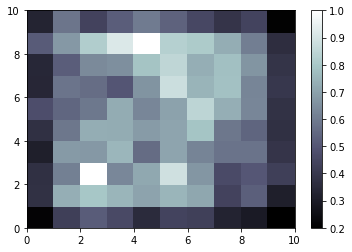

In [51]:
bone() 
pcolor(som.distance_map().T)  # Distance map as background 
colorbar() 
show() 

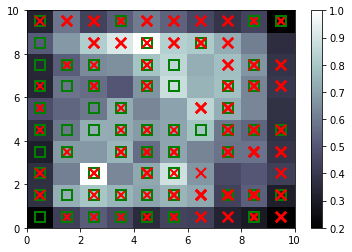

In [52]:
bone() 
pcolor(som.distance_map().T) 
colorbar() # gives legend 

markers = ['x', 's']  # if the observation is fraud then red cross color or else green square 
colors = ['r', 'g'] 

for i, x in enumerate(X): 
    w = som.winner(x) 
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None', 
         markersize = 10, 
         markeredgewidth = 2) 

show() 

In [53]:
mappings = som.win_map(X) 

Lighter tiles signify greater distance from winning nodes 

green square - Not Fraud (Approved)
red circles - Fraud (Rejected)

Green tiles represent **Approved** Customers **far from winning nodes**
Hence these are **Potential frauds**

***x = 2, y = 3***

***x = 4, y = 9*** 

In [61]:
mappings[(2,2)] 

[array([0.97284657, 0.        , 0.48496241, 0.14285714, 0.5       ,
        0.30769231, 0.25      , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.5       , 0.05      , 0.0096    ]),
 array([0.76672713, 0.        , 0.10646617, 0.10714286, 0.5       ,
        0.38461538, 0.375     , 0.00140351, 1.        , 0.        ,
        0.        , 0.        , 0.5       , 0.05      , 0.        ]),
 array([0.84423916, 0.        , 0.16917293, 0.39285714, 0.        ,
        0.38461538, 0.375     , 0.15789474, 1.        , 0.        ,
        0.        , 0.        , 0.5       , 0.06      , 0.        ]),
 array([0.90655471, 0.        , 0.30330827, 0.05660714, 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.5       , 0.16      , 0.        ]),
 array([0.91371847, 0.        , 0.2206015 , 0.125     , 0.5       ,
        0.61538462, 0.375     , 0.02929825, 1.        , 0.        ,
        0.        , 0.        , 0.      

In [62]:
mappings[(4,9)] 

[array([0.61757345, 0.        , 0.32210526, 0.13392857, 0.5       ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.08955224, 0.        , 0.5       , 0.        , 0.002     ]),
 array([7.82624365e-01, 0.00000000e+00, 4.13533835e-02, 4.46428571e-02,
        5.00000000e-01, 7.69230769e-01, 3.75000000e-01, 8.77192982e-03,
        0.00000000e+00, 1.00000000e+00, 1.49253731e-02, 0.00000000e+00,
        5.00000000e-01, 5.40000000e-02, 9.80000000e-04]),
 array([5.84745865e-01, 0.00000000e+00, 1.39097744e-01, 6.55357143e-02,
        5.00000000e-01, 3.07692308e-01, 2.50000000e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.49253731e-02, 0.00000000e+00,
        5.00000000e-01, 1.00000000e-01, 5.30000000e-04]),
 array([0.78492686, 0.        , 0.03503759, 0.01196429, 0.5       ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.01492537, 0.        , 0.5       , 0.08      , 0.00126   ]),
 array([8.22015064e-01, 0.00000000e+00, 

In [67]:
temp = np.concatenate((mappings[(2,2)], mappings[(4,9)]), axis = 0) 
pd.DataFrame(temp) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.972847,0.0,0.484962,0.142857,0.5,0.307692,0.250,0.000000,1.0,0.0,0.000000,0.0,0.5,0.050,0.00960
1,0.766727,0.0,0.106466,0.107143,0.5,0.384615,0.375,0.001404,1.0,0.0,0.000000,0.0,0.5,0.050,0.00000
2,0.844239,0.0,0.169173,0.392857,0.0,0.384615,0.375,0.157895,1.0,0.0,0.000000,0.0,0.5,0.060,0.00000
3,0.906555,0.0,0.303308,0.056607,0.0,0.000000,0.000,0.000000,1.0,0.0,0.000000,0.0,0.5,0.160,0.00000
4,0.913718,0.0,0.220602,0.125000,0.5,0.615385,0.375,0.029298,1.0,0.0,0.000000,0.0,0.0,0.140,0.00000
5,0.990986,0.0,0.167970,0.044643,0.5,0.000000,0.000,0.000000,1.0,0.0,0.000000,0.0,0.5,0.040,0.00000
6,0.617573,0.0,0.322105,0.133929,0.5,0.000000,0.000,0.000000,0.0,1.0,0.089552,0.0,0.5,0.000,0.00200
7,0.782624,0.0,0.041353,0.044643,0.5,0.769231,0.375,0.008772,0.0,1.0,0.014925,0.0,0.5,0.054,0.00098
8,0.584746,0.0,0.139098,0.065536,0.5,0.307692,0.250,0.000000,0.0,1.0,0.014925,0.0,0.5,0.100,0.00053
9,0.784927,0.0,0.035038,0.011964,0.5,0.000000,0.000,0.000000,0.0,1.0,0.014925,0.0,0.5,0.080,0.00126


the list of customers who are frauds:

In [68]:
temp = sc.inverse_transform(temp) # Gives the id numbers for the possible cheaters

In [71]:
frauds = pd.DataFrame(temp, columns=data.columns[:-1])
frauds.CustomerID = pd.to_numeric(frauds.CustomerID, downcast='integer')
frauds

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15808662,0.0,46.00,4.000,2.0,5.0,3.0,0.000,1.0,0.0,0.0,0.0,2.0,100.0,961.0
1,15757188,0.0,20.83,3.000,2.0,6.0,4.0,0.040,1.0,0.0,0.0,0.0,2.0,100.0,1.0
2,15776545,0.0,25.00,11.000,1.0,6.0,4.0,4.500,1.0,0.0,0.0,0.0,2.0,120.0,1.0
3,15792107,0.0,33.92,1.585,1.0,1.0,1.0,0.000,1.0,0.0,0.0,0.0,2.0,320.0,1.0
4,15793896,0.0,28.42,3.500,2.0,9.0,4.0,0.835,1.0,0.0,0.0,0.0,1.0,280.0,1.0
5,15813192,0.0,24.92,1.250,2.0,1.0,1.0,0.000,1.0,0.0,0.0,0.0,2.0,80.0,1.0
6,15719940,0.0,35.17,3.750,2.0,1.0,1.0,0.000,0.0,1.0,6.0,0.0,2.0,0.0,201.0
7,15761158,0.0,16.50,1.250,2.0,11.0,4.0,0.250,0.0,1.0,1.0,0.0,2.0,108.0,99.0
8,15711742,0.0,23.00,1.835,2.0,5.0,3.0,0.000,0.0,1.0,1.0,0.0,2.0,200.0,54.0
9,15761733,0.0,16.08,0.335,2.0,1.0,1.0,0.000,0.0,1.0,1.0,0.0,2.0,160.0,127.0


## Ids of Potential Fraudlant Customers

In [72]:
frauds.CustomerID

0     15808662
1     15757188
2     15776545
3     15792107
4     15793896
5     15813192
6     15719940
7     15761158
8     15711742
9     15761733
10    15770995
11    15736399
12    15766734
13    15667934
14    15665087
Name: CustomerID, dtype: int32